In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df.shape

(400, 5)

In [6]:
df.size

2000

In [7]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
df.drop(columns = 'User ID',axis = 1,inplace = True)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [10]:
df_cat = df.select_dtypes('object')
df_num = df.select_dtypes(include = ['int','float'])

In [11]:
df_cat

,Gender
0,Male
1,Male
2,Female
3,Female
4,Male
...,...
395,Female
396,Male
397,Female
398,Male


In [13]:
df_num

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [14]:
le = LabelEncoder()
df_cat['Gender'] = le.fit_transform(df_cat['Gender'])

In [15]:
df_cat

,Gender
0,1
1,1
2,0
3,0
4,1
...,...
395,0
396,1
397,0
398,1


In [16]:
df_new = pd.concat([df_cat,df_num],axis = 1)

In [17]:
df_new

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0
...,...,...,...,...
395,0,46,41000,1
396,1,51,23000,1
397,0,50,20000,1
398,1,36,33000,0


In [18]:
x = df_new[['Gender','Age','EstimatedSalary']]
y = df_new['Purchased']

In [19]:
x

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [22]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [24]:
kn = KNeighborsClassifier(n_neighbors = 11)
kn.fit(xtrain,ytrain)
yp = kn.predict(xtest)

In [25]:
accuracy_score(ytest,yp)

0.89

In [26]:
acc_list = []
for i in range(1,31):
    kn = KNeighborsClassifier(n_neighbors = i)
    kn.fit(xtrain,ytrain)
    yp = kn.predict(xtest)
    a = accuracy_score(ytest,yp)
    acc_list.append(a)
acc_list

[0.83,
 0.77,
 0.78,
 0.81,
 0.83,
 0.84,
 0.81,
 0.84,
 0.84,
 0.82,
 0.89,
 0.84,
 0.84,
 0.84,
 0.86,
 0.85,
 0.85,
 0.84,
 0.87,
 0.84,
 0.85,
 0.83,
 0.84,
 0.84,
 0.83,
 0.83,
 0.79,
 0.83,
 0.81,
 0.83]

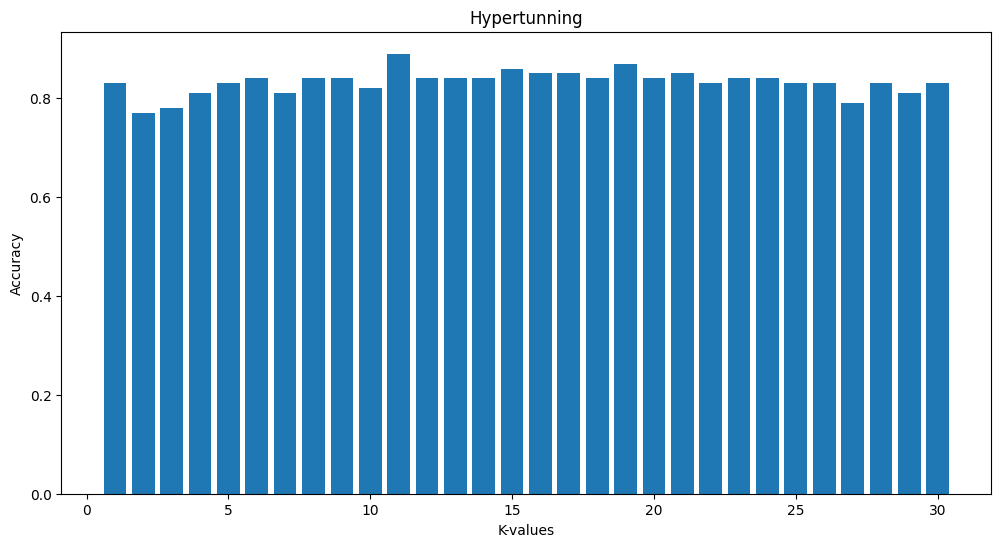

In [33]:
plt.figure(figsize = (12,6))
plt.bar(np.arange(1,31),acc_list)
plt.title('Hypertunning')
plt.xlabel('K-values')
plt.ylabel('Accuracy')
plt.show()

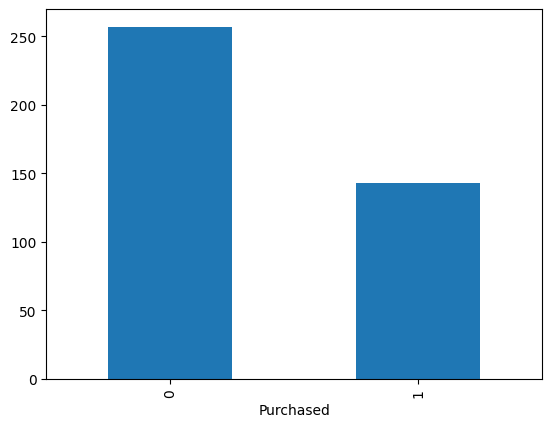

In [37]:
# check balancing of data
df['Purchased'].value_counts().plot(kind='bar')
plt.show()